In [1]:
# Import libraries and load dataset
import os
import sys
import importlib
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm

import common.common as common
importlib.reload(common)

df = pd.read_csv("Data.csv")

yr = list(df.yr)
df = df.set_index("yr")
df["yr"] = yr
df

,inbtou_volume,inbtou_volume_ov,inbtou_volume_sd,covid19_cases,covid19_deaths,covid19_mortality,yr
yr,,,,,,,
2010,553000.0,478000.0,75000.0,0,0,0.000000,2010
2011,538000.0,497000.0,41000.0,0,0,0.000000,2011
2012,603000.0,488000.0,115000.0,0,0,0.000000,2012
2013,623000.0,490000.0,133000.0,0,0,0.000000,2013
2014,696000.0,490000.0,206000.0,0,0,0.000000,2014
2015,761000.0,487000.0,274000.0,0,0,0.000000,2015
2016,842000.0,519000.0,323000.0,0,0,0.000000,2016
2017,1003000.0,536000.0,467000.0,0,0,0.000000,2017
2018,1002000.0,537000.0,465000.0,0,0,0.000000,2018


Estimated COVID-19 effect: -663716 ± 85944 (95% confidence)


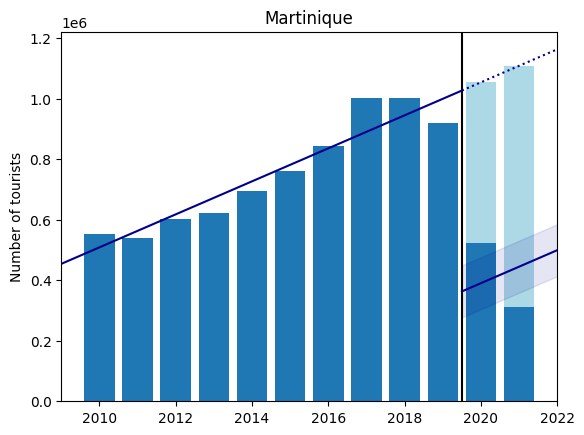

                            OLS Regression Results                            
Dep. Variable:      log_inbtou_volume   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     81.17
Date:                Wed, 26 Apr 2023   Prob (F-statistic):           2.49e-06
Time:                        15:29:40   Log-Likelihood:                 17.276
No. Observations:                  12   AIC:                            -26.55
Df Residuals:                       8   BIC:                            -24.61
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               -138

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [4]:
# Set up plot
plt.title('Martinique')
plt.ylabel('Number of tourists')
plt.xlim(2009, 2022)
y_name = 'inbtou_volume'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -252745 ± 14404 (95% confidence)


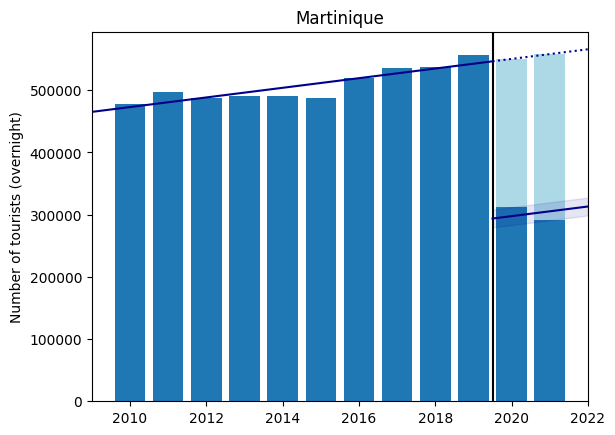

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_ov   R-squared:                       0.989
Model:                              OLS   Adj. R-squared:                  0.985
Method:                   Least Squares   F-statistic:                     242.4
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):           3.44e-08
Time:                          15:29:54   Log-Likelihood:                 29.423
No. Observations:                    12   AIC:                            -50.85
Df Residuals:                         8   BIC:                            -48.91
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [5]:
# Set up plot
plt.title('Martinique')
plt.ylabel('Number of tourists (overnight)')
plt.xlim(2009, 2022)
y_name = 'inbtou_volume_ov'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)

Estimated COVID-19 effect: -410971 ± 80413 (95% confidence)


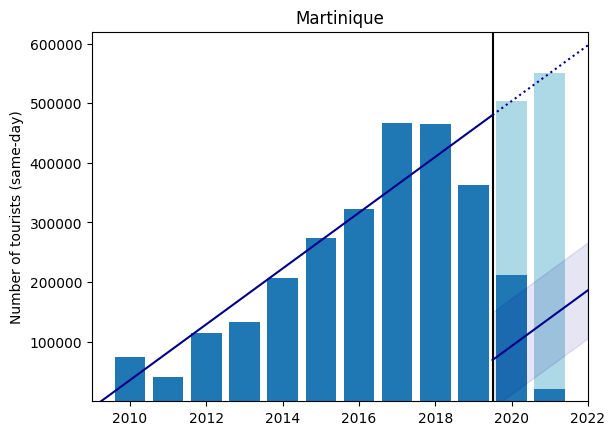

                             OLS Regression Results                             
Dep. Variable:     log_inbtou_volume_sd   R-squared:                       0.913
Model:                              OLS   Adj. R-squared:                  0.881
Method:                   Least Squares   F-statistic:                     28.16
Date:                  Wed, 26 Apr 2023   Prob (F-statistic):           0.000133
Time:                          15:30:32   Log-Likelihood:                -1.5830
No. Observations:                    12   AIC:                             11.17
Df Residuals:                         8   BIC:                             13.11
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercep

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [8]:
# Set up plot
plt.title('Martinique')
plt.ylabel('Number of tourists (same-day)')
plt.xlim(2009, 2022)
plt.ylim(1, 6.2 * 10**5)
y_name = 'inbtou_volume_sd'

# Filter out NaN data
_df = pd.DataFrame(df).loc[df[y_name].notna()]

# Generate difference-in-differences plot
effect, stderr = common.gen_did_plot(_df, y_name)
print(f"Estimated COVID-19 effect: {int(effect)} ± {int(stderr)} (95% confidence)")

# Render plot
plt.show()

# Run OLS regression
common.run_covid19_regression(_df, y_name, log_level=True)